In [26]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from sklearn import preprocessing
import warnings, sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import dask
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.robust
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [27]:
# Data types for less memory usage
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [28]:
train = pd.read_csv("train.csv", dtype = dtypes)
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [29]:
print(train.shape)

(8921483, 83)


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float16 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                    

-------------------------------------------------------------------------------------------------------
Find Null and Missing values 
-----------------------------------------------------------------------------------------------

In [31]:
train.isnull().values.any()

True

In [32]:
print("Total Columns: ", train.shape[1])
print("Total columns with Missing Values: 44\n")

pd.set_option('display.max_rows', None)
missing_values = (train.isna().sum())
print(missing_values.sort_values(ascending = False))

Total Columns:  83
Total columns with Missing Values: 44

PuaMode                                              8919174
Census_ProcessorClass                                8884852
DefaultBrowsersIdentifier                            8488045
Census_IsFlightingInternal                           7408759
Census_InternalBatteryType                           6338429
Census_ThresholdOptIn                                5667325
Census_IsWIMBootEnabled                              5659703
SmartScreen                                          3177011
OrganizationIdentifier                               2751518
SMode                                                 537759
CityIdentifier                                        325409
Wdft_IsGamer                                          303451
Wdft_RegionIdentifier                                 303451
Census_InternalBatteryNumberOfCharges                 268755
Census_FirmwareManufacturerIdentifier                 183257
Census_IsFlightsDisabled   

In [33]:
pd.set_option('display.max_rows', None)
print("% of Missing Values for each Column\n")

missing_values_percentage = (train.isna().sum() * 100 / len(train))
print(missing_values_percentage.sort_values(ascending = False))

% of Missing Values for each Column

PuaMode                                              99.974119
Census_ProcessorClass                                99.589407
DefaultBrowsersIdentifier                            95.141637
Census_IsFlightingInternal                           83.044030
Census_InternalBatteryType                           71.046809
Census_ThresholdOptIn                                63.524472
Census_IsWIMBootEnabled                              63.439038
SmartScreen                                          35.610795
OrganizationIdentifier                               30.841487
SMode                                                 6.027686
CityIdentifier                                        3.647477
Wdft_IsGamer                                          3.401352
Wdft_RegionIdentifier                                 3.401352
Census_InternalBatteryNumberOfCharges                 3.012448
Census_FirmwareManufacturerIdentifier                 2.054109
Census_IsFlightsDi

In [34]:
# Check for duplicated data 
duplicates = train.duplicated()
print(f'Number of duplicate rows =', (duplicates.sum()))

Number of duplicate rows = 0


# **Balanced Data**

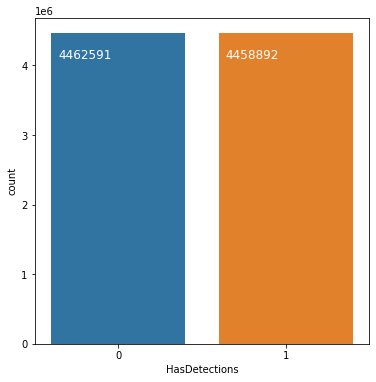

In [35]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="HasDetections", data=train, label="Label count")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

In [36]:
c= train.corr()
c

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
IsBeta,1.000000,0.000129,-0.000051,-0.002435,-0.003540,-0.000598,0.002370,-0.021834,0.000916,-0.000370,...,-0.000846,-0.002665,-2.189444e-06,0.000259,-0.001038,-0.000545,-0.000669,-0.001293,0.000730,-0.000040
RtpStateBitfield,0.000129,1.000000,-0.885303,-0.009013,0.108633,-0.184162,0.009698,-0.005797,0.012023,-0.001224,...,0.007264,-0.015517,8.306472e-05,0.008227,0.009711,0.005180,0.020278,-0.022863,-0.003491,0.041486
IsSxsPassiveMode,-0.000051,-0.885303,1.000000,0.010213,-0.113841,0.194934,0.025219,0.013812,-0.012522,0.000982,...,-0.007214,0.020067,-6.977721e-05,-0.010291,-0.006183,-0.001402,-0.015852,0.030682,0.002790,-0.035066
DefaultBrowsersIdentifier,-0.002435,-0.009013,0.010213,1.000000,0.001801,0.002359,-0.010120,-0.013976,-0.001561,0.004813,...,0.025183,0.070875,NaN,-0.011235,0.010328,0.014866,0.005312,0.012515,0.015218,-0.002002
AVProductStatesIdentifier,-0.003540,0.108633,-0.113841,0.001801,1.000000,-0.632899,-0.122054,0.140325,0.006339,-0.001446,...,-0.018865,-0.034235,2.583190e-04,0.029202,0.040984,0.035448,0.063949,-0.022421,-0.020109,0.117404
AVProductsInstalled,-0.000598,-0.184162,0.194934,0.002359,-0.632899,1.000000,0.286430,0.025564,-0.022442,0.004235,...,0.042414,0.214745,-3.927709e-04,-0.045854,-0.013320,-0.028525,-0.070722,0.016036,0.033732,-0.149626
AVProductsEnabled,0.002370,0.009698,0.025219,-0.010120,-0.122054,0.286430,1.000000,-0.043451,-0.018487,0.005327,...,-0.001276,0.039220,-8.703695e-05,-0.010598,-0.002616,-0.008302,-0.020091,-0.013307,0.005794,-0.041985
HasTpm,-0.021834,-0.005797,0.013812,-0.013976,0.140325,0.025564,-0.043451,1.000000,0.003809,-0.007577,...,0.008914,0.086069,7.998986e-05,0.002080,0.029129,0.017395,0.026188,0.063420,-0.013442,0.005490
CountryIdentifier,0.000916,0.012023,-0.012522,-0.001561,0.006339,-0.022442,-0.018487,0.003809,1.000000,0.000207,...,0.021221,-0.010058,4.508359e-04,-0.005753,0.004860,-0.010613,-0.005898,0.017374,-0.117656,0.007099
CityIdentifier,-0.000370,-0.001224,0.000982,0.004813,-0.001446,0.004235,0.005327,-0.007577,0.000207,1.000000,...,0.015764,0.008822,8.397056e-05,0.004531,-0.011361,-0.000863,0.000416,0.003759,-0.058748,-0.002282


<AxesSubplot:>

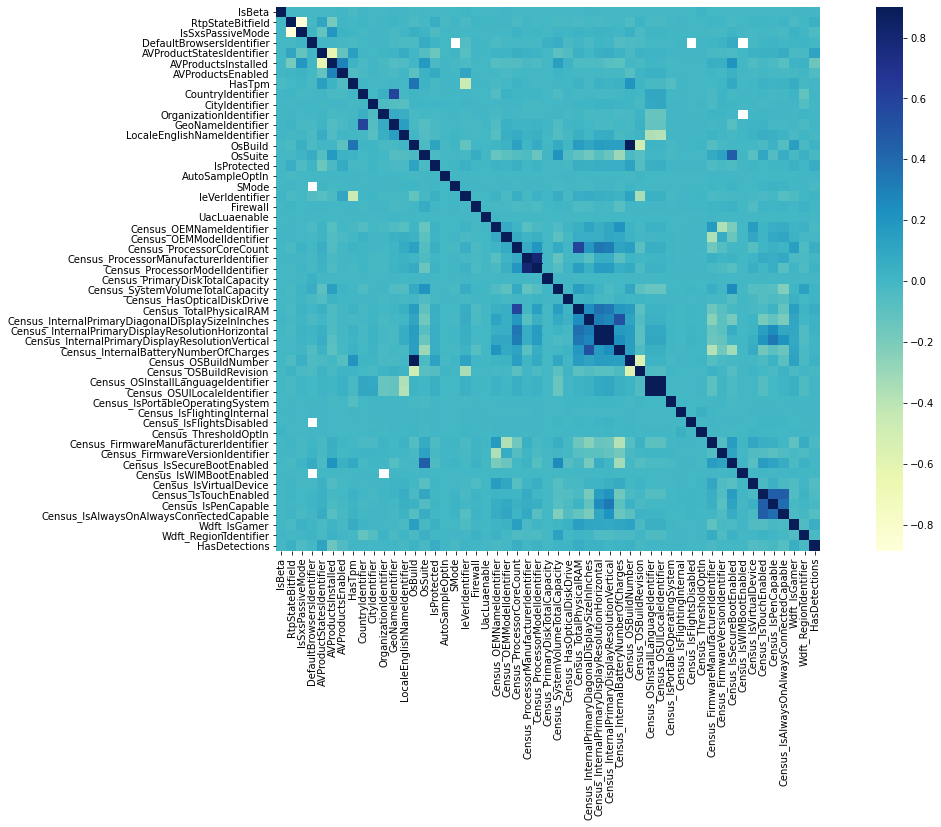

In [37]:
data_correlation = train.corr()
f = plt.subplots(figsize=(20, 10))
sns.heatmap(data_correlation, cmap="YlGnBu", vmax=.9, square=True)

Seperate the categorical and the numerical columns in the Train Set

In [38]:
categorical_col = list(train.loc[:, train.dtypes =="category"].columns)

categorical_col.remove("MachineIdentifier")

In [39]:
numerical_and_binary_col = list(train.loc[:, train.dtypes !="category"].columns)
numerical_col = numerical_and_binary_col

binary_col = []
for col in (numerical_and_binary_col):
    if train[col].nunique() == 2:
        binary_col.append(col)
        numerical_col.remove(col)

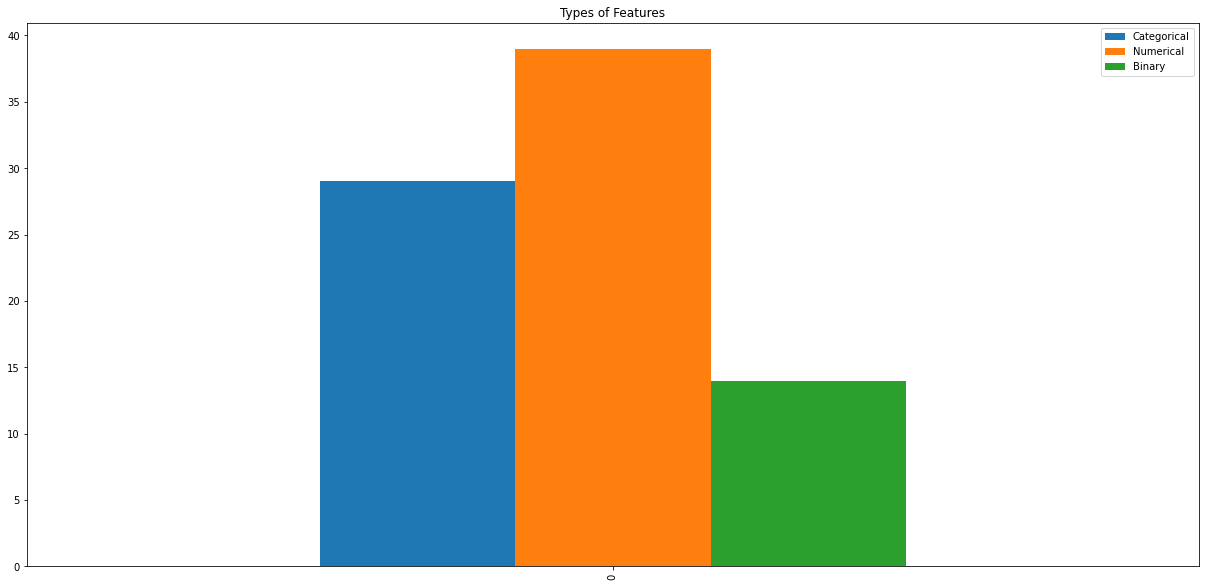

In [40]:
categories_list = []
categories_list.append(len(categorical_col))
categories_list.append(len(numerical_col))
categories_list.append(len(binary_col))

categories_df = pd.DataFrame(categories_list, 
                             index=["Categorical", "Numerical", "Binary"])

categories_df = categories_df.transpose().plot(legend = True, kind="bar", figsize=(21, 10), title="Types of Features")


In [41]:
def with_hue(plot, feature, Number_of_categories,hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [42]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

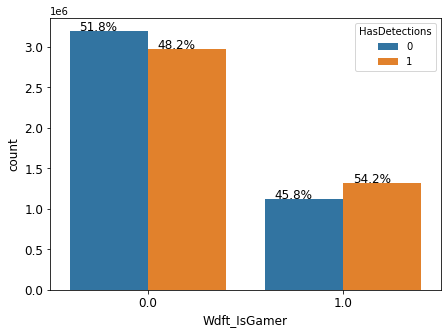

In [43]:
plt.figure(figsize = (7,5))
ax = sns.countplot('Wdft_IsGamer', hue= 'HasDetections', data = train)
plt.xticks(size = 12)
plt.xlabel('Wdft_IsGamer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.Wdft_IsGamer,2,2)

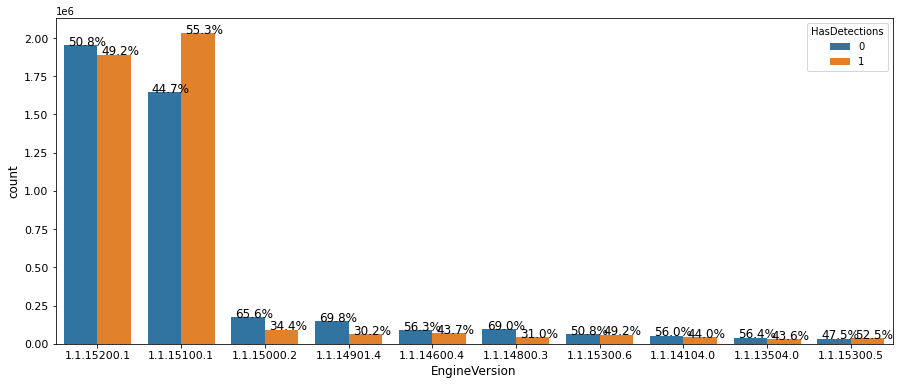

In [44]:
plt.figure(figsize = (15,6))
ax = sns.countplot('EngineVersion', order = train.EngineVersion.value_counts().iloc[:10].index, hue = 'HasDetections', data = train)
plt.xticks(size = 11)
plt.xlabel('EngineVersion', size = 12)
plt.yticks(size = 11)
plt.ylabel('count', size = 12)

with_hue(ax, train.EngineVersion,10,2)

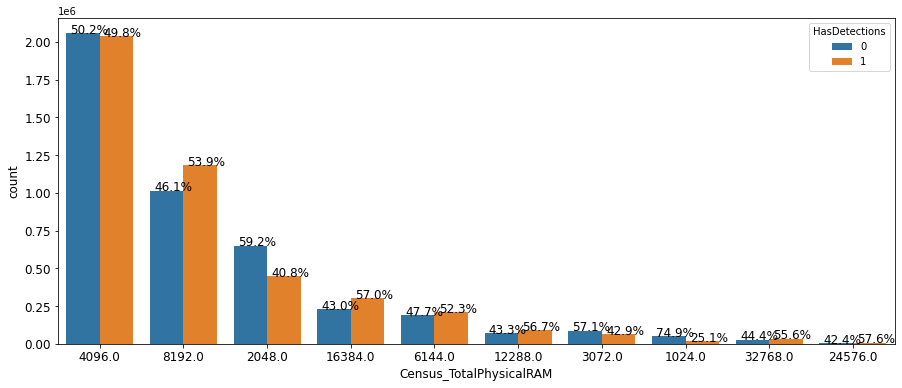

In [45]:
plt.figure(figsize = (15,6))
ax = sns.countplot('Census_TotalPhysicalRAM', order = train.Census_TotalPhysicalRAM.value_counts().iloc[:10].index, hue = 'HasDetections', data = train)
plt.xticks(size = 12)
plt.xlabel('Census_TotalPhysicalRAM', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.Census_TotalPhysicalRAM,10,2)

In [ ]:
#Drop 9 Features with over 30% null
train.drop(columns= ['PuaMode','Census_ProcessorClass','DefaultBrowsersIdentifier', 'Census_IsFlightingInternal','Census_InternalBatteryType', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'SmartScreen', 'OrganizationIdentifier'], axis = 1)

In [ ]:
def unique_val(data, columns):
    unique = []
    for col in columns:
        u = data[col].nunique()
        unique.append((col,u,data[col].value_counts(normalize=True).values[0] * 100))
    return unique

In [ ]:
columns = train.columns
unique = unique_val(train, columns)

In [ ]:
unique_values = pd.DataFrame(unique, columns = ['Features','unique_values','Largest category percentage']).sort_values('Largest category percentage', 
                                                                                                                       ascending = False)

In [ ]:
imbalanced_columns = unique_values[unique_values['Largest category percentage'] > 90.0]
imbalanced_columns

In [ ]:
len(imbalanced_columns)

In [ ]:
#dropping the imbalanced columns
train1 = train.drop(columns = imbalanced_columns.Features)

In [ ]:
train1=train1.drop('MachineIdentifier', axis= 1)

In [ ]:
train1.DefaultBrowsersIdentifier.fillna(0, inplace=True)

In [ ]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist', 'ExistsNotSet' : 'ExistsNotSet'
}
train1.replace({'SmartScreen': trans_dict}, inplace=True)

In [ ]:
train1.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [ ]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train1.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [ ]:
train1.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [ ]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist', 'ExistsNotSet' : 'ExistsNotSet'
}
train1.replace({'SmartScreen': trans_dict}, inplace=True)

In [ ]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train1.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [ ]:
train1.dropna(inplace=True)

In [ ]:
train1.info()

**Modeling**

In [ ]:
labelencoder = LabelEncoder()
columns = []

data_le = train1.copy()

In [ ]:
for column in train1.select_dtypes(include=['object']):
  data_le[column] = labelencoder.fit_transform(data_le[column])
  columns.append(column)

In [ ]:
for column in train1.select_dtypes(include=['category']):
  data_le[column] = labelencoder.fit_transform(data_le[column])
  columns.append(column)

In [ ]:
scaler = MinMaxScaler()
t_data_le = scaler.fit_transform(data_le)
t_data_le_df = pd.DataFrame(t_data_le)


In [ ]:
y_le = t_data_le_df[54]
X_le = t_data_le_df.drop([54], axis=1)

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.2, random_state=4)


In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100), activation='relu', learning_rate_init = 0.01, max_iter=400)
mlp_classifier.fit(X_train_le, y_train_le)
mlp_predict_value = mlp_classifier.predict(X_test_le)
mlp_score_value = mlp_classifier.score(X_test_le, y_test_le)
print("NN accuracy:", mlp_score_value)


neigh = KNeighborsClassifier(n_neighbors=170)
neigh.fit(X_train_le, y_train_le)
neigh_predict_value = neigh.predict(X_test_le)
neigh_score_value = neigh.score(X_test_le, y_test_le)
print("KNN accuracy:", neigh_score_value)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf.fit(X_train_le, y_train_le)
clf_predict_value = clf.predict(X_test_le)
clf_score_value = clf.score(X_test_le, y_test_le)
print("SVM accuracy:", clf_score_value)

In [ ]:
# predict probabilities
pred_prob1 = mlp_classifier.predict_proba(X_test_le)
pred_prob2 = neigh.predict_proba(X_test_le)


fpr1, tpr1, thresh1 = roc_curve(y_test_le, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_le, pred_prob2[:,1], pos_label=1)

In [ ]:
pred_prob3= clf.predict_proba(X_test_le)
fpr3, tpr3, thresh3 = roc_curve(y_test_le, pred_prob3[:,1], pos_label=1)

In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_le))]
p_fpr, p_tpr, _ = roc_curve(y_test_le, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score
# auc scores
mlp_auc_score1 = roc_auc_score(y_test_le, pred_prob1[:,1])
neigh_auc_score2 = roc_auc_score(y_test_le, pred_prob2[:,1])
clf_auc_score3 = roc_auc_score(y_test_le, pred_prob3[:,1])

print(mlp_auc_score1, neigh_auc_score2, clf_auc_score3)

In [ ]:
Classifier = ['SVM','KNN','MLP']
auc_score = [mlp_auc_score1.round(3),neigh_auc_score2.round(3),clf_auc_score3.round(3)]

plt.bar(Classifier, auc_score)
plt.title('Model AUC Score')
plt.xlabel('Classifier')
plt.ylabel('AUC score ')
plt.show()


print(f'SVM AUC Score: {(clf_auc_score3*100).round(3)}')
print(f'KNN AUC Score: {(neigh_auc_score2*100).round(3)}')
print(f'MLP AUC Score: {(mlp_auc_score1*100).round(3)}')

In [ ]:
print(f'MLP Confusion Matrix: \n', confusion_matrix(y_test_le,mlp_predict_value), '\n')

print("True Positives: ", confusion_matrix(y_test_le,mlp_predict_value)[0][0])
print("False Positives: ", confusion_matrix(y_test_le,mlp_predict_value)[0][1])
print("False Negatives: ", confusion_matrix(y_test_le,mlp_predict_value)[1][0])
print("True Negatives: ", confusion_matrix(y_test_le,mlp_predict_value)[1][1])


In [ ]:
print(f'KNN Confusion Matrix: \n', confusion_matrix(y_test_le,neigh_predict_value), '\n')

print("True Positives: ", confusion_matrix(y_test_le,neigh_predict_value)[0][0])
print("False Positives: ", confusion_matrix(y_test_le,neigh_predict_value)[0][1])
print("False Negatives: ", confusion_matrix(y_test_le,neigh_predict_value)[1][0])
print("True Negatives: ", confusion_matrix(y_test_le,neigh_predict_value)[1][1])

In [ ]:
print(f'SVM Confusion Matrix: \n', confusion_matrix(y_test_le,clf_predict_value), '\n')

print("True Positives: ", confusion_matrix(y_test_le,clf_predict_value)[0][0])
print("False Positives: ", confusion_matrix(y_test_le,clf_predict_value)[0][1])
print("False Negatives: ", confusion_matrix(y_test_le,clf_predict_value)[1][0])
print("True Negatives: ", confusion_matrix(y_test_le,clf_predict_value)[1][1])

In [ ]:
train1.shape

In [ ]:
print(f'\nMLP Classification Report\n', classification_report(y_test_le, mlp_predict_value))

In [ ]:
print(f'\nKNN Classification Report\n', classification_report(y_test_le, neigh_predict_value))

In [ ]:
print(f'\nSVM Classification Report\n', classification_report(y_test_le, clf_predict_value))